<ipython-input-1-ae3a1b7ee9bf>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


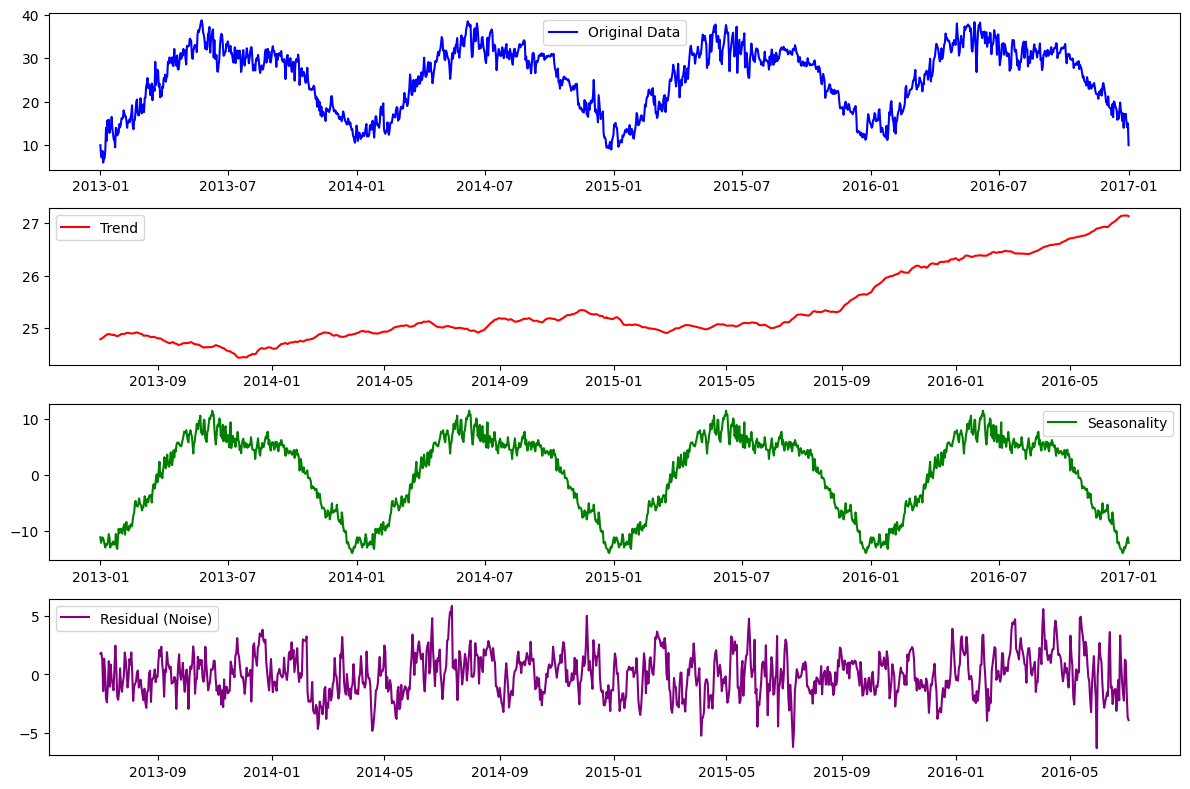

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 🔹 Enter your dataset path
dataset_path = "/content/DailyDelhiClimateTrain.csv"  # Replace with actual file path

# 🔹 Load the dataset
data = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# 🔹 Handle missing values (forward fill)
data.fillna(method='ffill', inplace=True)

# 🔹 Apply Time Series Decomposition (Additive Model)
decomposition = seasonal_decompose(data['meantemp'], model='additive', period=365)

# 🔹 Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 🔹 Plot components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['meantemp'], label='Original Data', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residual (Noise)', color='purple')
plt.legend()

plt.tight_layout()
plt.show()
